# Conveyance Curve

In ICM, the conveyance curve needs to be reviewed to avoid this [particular problem](http://help.floodmodeller.com/floodmodeller/Technical_Reference/1D_Nodes_Reference/Rivers/Conveyance_and_Cross-Section_Property_Display.htm).

```
"A common cause of instabilities in a model is a decrease in conveyance with increasing stage, 
therefore the conveyance plotting tool gives the modeller a quick reference to check that conveyance 
increases monotonically and smoothly with stage. A decrease in conveyance as the water level goes out-of-bank 
may be rectified by adding a panel marker at bank level."
```

# Channel Conveyance

Using manning's equation the discharge at a given cross section can be calculated using the cross section geometry, manning's n and the slope of channel.



# Panel
In general, as water rises in the cross section, its area increases, and the wetted perimeter increases. In general, the area increases faster than the increases of the wetted perimeter so that the conveyance (Q) keeps increasing.

However, when the water started to flow over the main channel into the much shallower overbank areas, or some flat and small depressed areas of the cross section, the wetted perimeter increases much faster and as a result the Q decreases.
In some cases, this is what happened in the real world. However, in most of the cases, it is the result of an oversimplification of our conveyance calculation. When water flows overbank, it shouldn't decrease most of the conveyance within the main channel, however since we ignored the detailed geometry in the calculation, we wouldn’t be able to correct it.
To overcome this limitation, panels are added to divide cross section into sections, and conveyance is calculated for each panel, that way when water overflows to the overbank, it doesn’t impact the conveyance in the main channel.



For example, HECRAS calculates the cross section parameters using the following method,

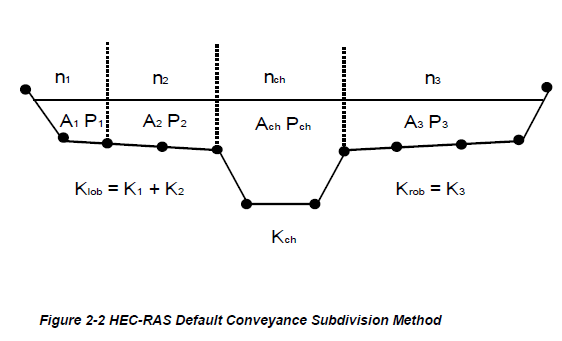

# Examples of Q decreases as flow depth increases

For partially full pipe flow, the max flow occurs before the pipe is full. As explained in [here](https://en.wikipedia.org/wiki/Flow_in_partially_full_conduits).


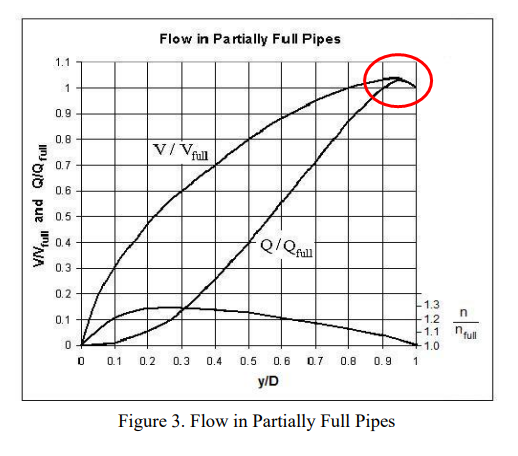

According to [this study](http://www.river-conveyance.net/1_CES_UserGuide.pdf), conveyance can jump or decrease as water flows overbank in real world.

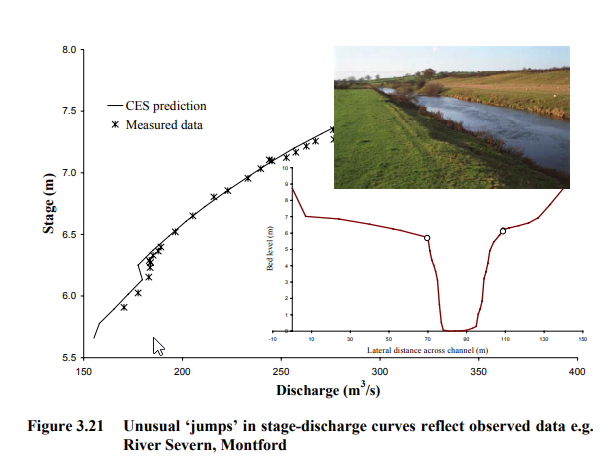

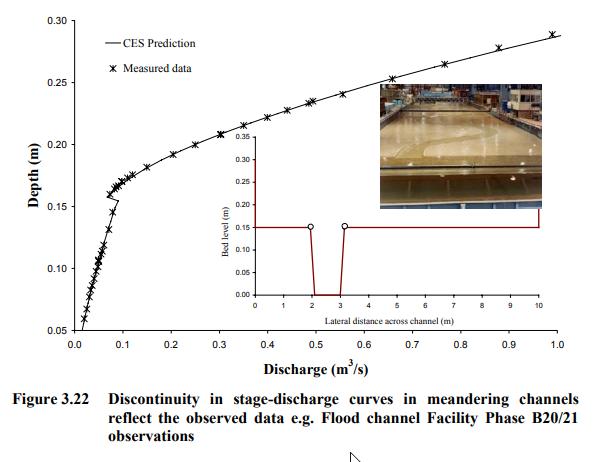

# ICM Conveyance Example

As shown below, I built a simple river reach with this cross section. Any time I added a flat area, the conveyance calculation will have some issues calculating the results.

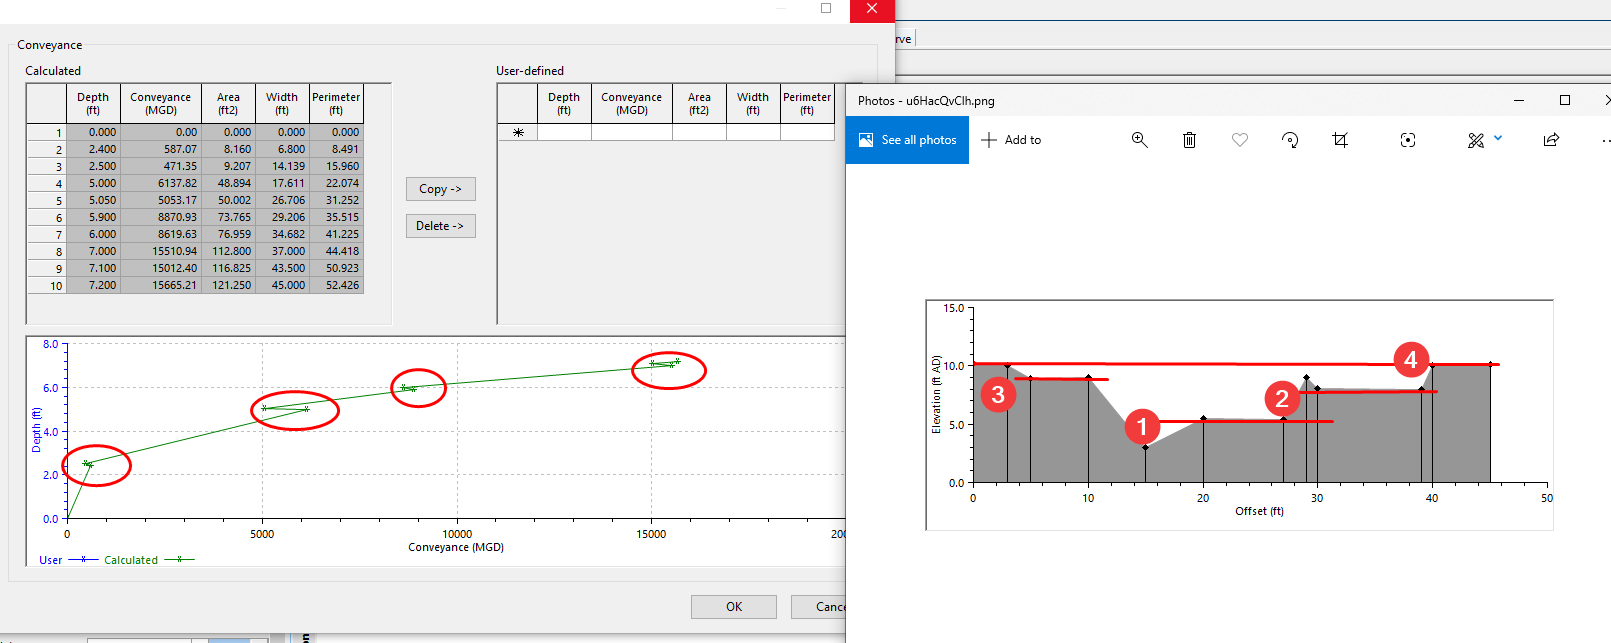

Next I will check how ICM does its calculation in python. What I noticed is that the conveyance curve assumes a slope of 1 ft/ft, or I think it simply ignores slope term in the calculation.

I copy and pasted the conveyance curve table into a csv file: **GitHub\SewerAnalysis\references\river\conveyance\data\conveyance_curve.csv**

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt

# read the csv file
ws = r'C:\Users\Mel.Meng\Documents\GitHub\SewerAnalysis\references\river\conveyance\data'
conveyance_curve = os.path.join(ws, 'conveyance_curve.csv')
df = pd.read_csv(conveyance_curve)

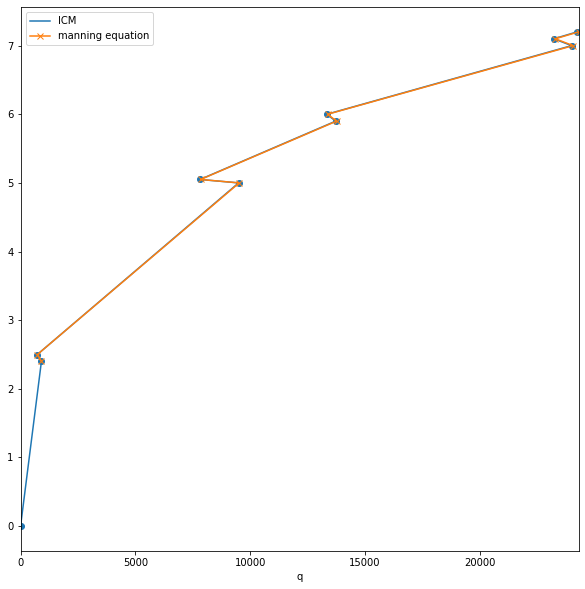

In [2]:
# perform the calculation

slope = 1 # seems ICM always uses 1

# calculate the hydraulic radus using the reported values in ICM
df['r'] = df['Area (ft2)']/df['Perimeter (ft)']

# using manning's equation to calculate the discharge
df['q'] = (1.49/0.013)*df['Area (ft2)']*(df['r']**(2/3))

# plot the results
ax = df.plot(x='no_panel', y='Depth (ft)', style='o-', label='ICM', figsize=(10,10))
df.plot(x='q', y='Depth (ft)', style='x-', ax=ax, label='manning equation')
plt.show()

# Adding Panels to fix the issues



As shown in the figure below, I basically set the panel markers at the overflow points. And you can find the scenarios in this file: **GitHub\SewerAnalysis\references\river\conveyance\data\conveyance_curve.icmt**

- Panel 4: by adding a panel marker at point 4, I divided the cross section in two panels
- Panel 6: then add panel marker at point 6, I further divide the cross section into 3 panels
- similarly I keep dividing at Panel 9 and 11


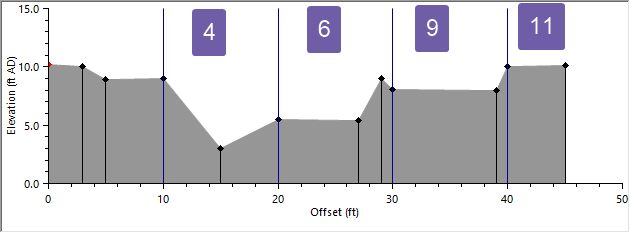

After pasting the conveyance results into the same csv file, I can plot the changes after adding the panel markers using the script below. I also added the 

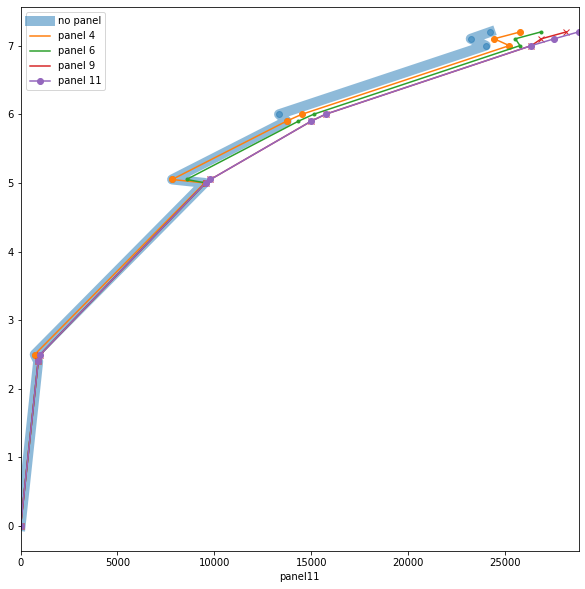

In [3]:
# perform the calculation

slope = 1 # seems ICM always uses 1

# calculate the hydraulic radus using the reported values in ICM
df['r'] = df['Area (ft2)']/df['Perimeter (ft)']

# using manning's equation to calculate the discharge
df['q'] = (1.49/0.013)*df['Area (ft2)']*(df['r']**(2/3))

# plot the results
ax = df.plot(x='no_panel', y='Depth (ft)', style='o-', label='no panel', linewidth=10, alpha=0.5, figsize=(10,10))
# df.plot(x='q', y='Depth (ft)', style='x-', ax=ax, label='manning')
df.plot(x='panel4', y='Depth (ft)', style='o-', ax=ax, label='panel 4')
df.plot(x='panel6', y='Depth (ft)', style='.-', ax=ax, label='panel 6')
df.plot(x='panel9', y='Depth (ft)', style='x-', ax=ax, label='panel 9')
df.plot(x='panel11', y='Depth (ft)', style='o-', ax=ax, label='panel 11')
# plt.xlim(0, 5000)
plt.show()

In [4]:
df

,Depth (ft),no_panel,Area (ft2),Width (ft),Perimeter (ft),panel4,panel6,panel9,panel11,panel_random,panel_all,r,q
0,0.00,0.00,0.000,0.000,0.000,0.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN
1,2.40,908.32,8.160,6.800,8.491,908.32,908.32,908.32,908.32,920.28,920.28,0.961018,910.794963
2,2.50,729.28,9.207,14.139,15.960,729.28,1018.23,1018.23,1018.23,744.40,1031.57,0.576880,731.281461
3,5.00,9496.58,48.894,17.611,22.074,9496.58,9546.64,9546.64,9546.64,9669.88,10397.12,2.215004,9522.438379
4,5.05,7818.38,50.002,26.706,31.252,7818.38,8562.69,9798.88,9798.88,9931.40,10683.80,1.599962,7839.770185
5,5.90,13725.31,73.765,29.206,35.515,13725.31,14339.17,14999.55,14999.55,15575.60,16908.16,2.077010,13763.185015
6,6.00,13336.50,76.959,34.682,41.225,14515.32,15119.21,15734.46,15734.46,15664.77,17783.16,1.866804,13373.184399
7,7.00,23998.90,112.800,37.000,44.418,25215.48,25766.92,26353.22,26353.22,26733.11,28989.54,2.539511,24064.975046
8,7.10,23227.54,116.825,43.500,50.923,24437.99,25530.37,26872.87,27539.30,28008.03,30308.50,2.294150,23291.274021
9,7.20,24237.59,121.250,45.000,52.426,25786.24,26851.56,28159.12,28791.45,29344.34,31680.92,2.312784,24304.200882


# Preliminary Results
As shown in the plot above, by diving the cross sections at each of the overflow point, I slowly get rid of the problems at elevation a time.

# Sensitivity Analysis

As I noticed, there is no obvious way to place the panel markers, and that's probably why ICM didn't automate the insertion of panel markers. Let's make a few randomly place markers and see how that works.

I can add panel markers at all points: panel all scenario

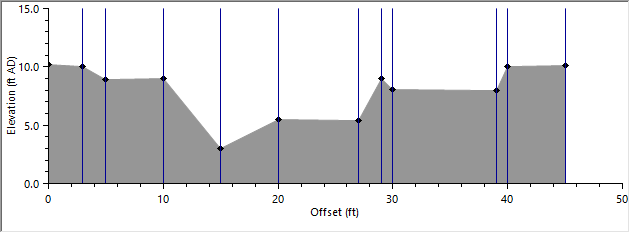

Randomly add panel markers: panel random scenario

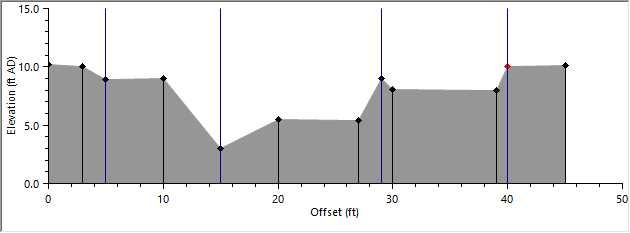

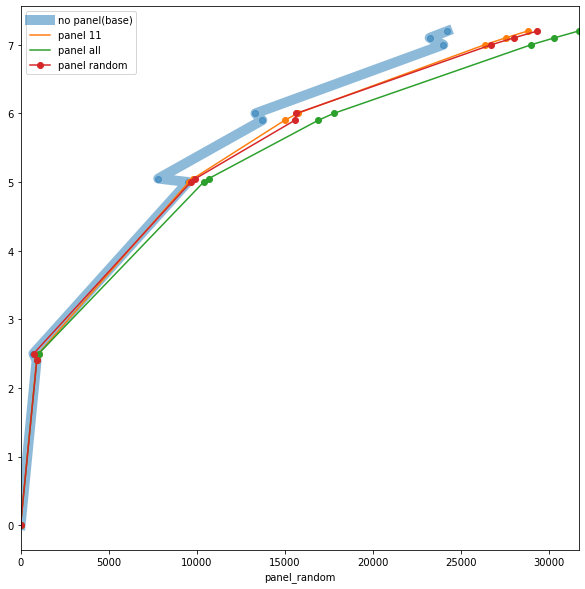

In [5]:
df = pd.read_csv(conveyance_curve)
# plot the results
ax = df.plot(x='no_panel', y='Depth (ft)', style='o-', label='no panel(base)', linewidth=10, alpha=0.5, figsize=(10,10))
df.plot(x='panel11', y='Depth (ft)', style='o-', ax=ax, label='panel 11')
df.plot(x='panel_all', y='Depth (ft)', style='o-', ax=ax, label='panel all')
df.plot(x='panel_random', y='Depth (ft)', style='o-', ax=ax, label='panel random')
# plt.xlim(0, 5000)
plt.show()

# Conclusion
As shown above, apparently how the panels are divided will impact the conveyance curve. The scenario with panel markers at all points resulted much lower conveyance, and the randomly placed markers also showed noticable differnce from our best estimate.

Next time, if I am not sure how I should add my panel markers I'll most likely perform a similar analysis to make sure I understand how much an impact my panel markers decisions will make on the conveyance curve.

# Calculating Cross Section Geometry in Python

Just for fun, I would like to see how hard it is to calculate area and wetted perimeter uisng python.


I saved the cross section to the file : cross section.csv

In [6]:
import numpy as np
f = os.path.join(ws, 'cross section.csv')
df_xs = pd.read_csv(f)

In [7]:
df_xs

,offset,X coordinate (ft),Y coordinate (ft),z,Roughness Manning's n,New panel
0,0,45,1000,10.20,0.013,NaN
1,3,42,1000,10.00,0.013,NaN
2,5,40,1000,8.90,0.013,NaN
3,10,35,1000,9.00,0.013,NaN
4,15,30,1000,3.00,0.013,NaN
5,20,25,1000,5.50,0.013,NaN
6,27,18,1000,5.40,0.013,0.0
7,29,16,1000,9.00,0.013,NaN
8,30,15,1000,8.05,0.013,NaN
9,39,6,1000,8.00,0.013,NaN


## Sampling the Cross Section

To use the area function np.trapz, I'll need to sample the profile at regular intervals. I basically divided the profile into 1000 points. The green dots are the orignal data, and the dense X are the interpolated points.

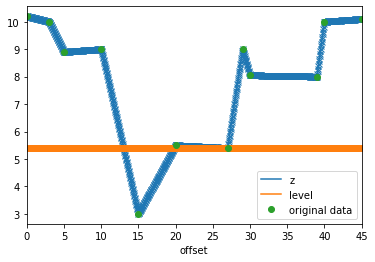

In [10]:
offset = np.linspace(0, 45, 1000)
z = np.interp(offset, df_xs['offset'], df_xs['z'])

df2 = pd.DataFrame({'offset': offset, 'z': z})
df2['level'] = [5.4]*len(offset)
ax = df2.plot(x='offset', y='z', style='x-')
df2.plot(x='offset', y='level', style='x-', ax=ax)
df_xs.plot(x='offset', y='z', style='o', ax=ax, label='original data')

In [13]:
def line_length(x, y):
    npts = len(x)
    # need to make sure it is a line with at least 2 points
    if npts < 2:
        return 0
    arc = np.sqrt((x[1] - x[0])**2 + (y[1] - y[0])**2)
    for k in range(1, npts):
        arc = arc + np.sqrt((x[k] - x[k-1])**2 + (y[k] - y[k-1])**2)

    return arc

def get_area(xs_csv, level, level_fld='level', z_fld = 'z', offset_fld='offset'):
    df_xs = pd.read_csv(xs_csv)
    
    # interpolate profile using regular spacing so that I can calculate the area
    offset = np.linspace(min(df_xs[offset_fld].values), max(df_xs[offset_fld].values), 1000)
    z = np.interp(offset, df_xs[offset_fld], df_xs[z_fld])

    df2 = pd.DataFrame({'offset': offset, 'z': z})
    df2[level_fld] = [level]*len(offset)
    # get the dx for the x axis
    dx = df2[offset_fld].diff().values[-1]
    
    # find the area below the water level
    area = df2.loc[df2[level_fld] >= df2[z_fld]]
    # get the area under level line
    a1 = np.trapz(area[level_fld], x=None, dx=dx, axis=-1)
    # get the area under the cross section
    a2 = np.trapz(area[z_fld], x=None, dx=dx, axis=-1)
    a3 = a1 - a2
    l = line_length(area[offset_fld].values, area[z_fld].values)
    return a3, l

In [14]:
df['python_area'] = 0
df['python_perimeter'] = 0
for idx, r in df.iterrows():
    level = r['Depth (ft)']
    icm_area = r['Area (ft2)']
    a, l = get_area(xs_csv=f, level=level+3, level_fld='level', z_fld = 'z', offset_fld='offset')
    df.loc[idx, 'python_area'] = a
    df.loc[idx, 'python_perimeter'] = l
    
    
    
df.loc[:, ['Depth (ft)', 'Area (ft2)', 'python_area', 'Perimeter (ft)', 'python_perimeter']]
    

,Depth (ft),Area (ft2),python_area,Perimeter (ft),python_perimeter
0,0.00,0.000,0.000000,0.000,0.000000
1,2.40,8.160,8.159646,8.491,8.504678
2,2.50,9.207,9.205694,15.960,15.946019
3,5.00,48.894,48.893301,22.074,22.058055
4,5.05,50.002,50.001258,31.252,32.765261
5,5.90,73.765,73.763391,35.515,45.709292
6,6.00,76.959,76.957126,41.225,41.154440
7,7.00,112.800,112.799590,44.418,44.419470
8,7.10,116.825,116.824764,50.923,50.905390
9,7.20,121.250,121.249797,52.426,52.440321


As shown above, my calculation is pretty close to ICM reported values. When I have more time, I might do a few calculation of the panels.